<h1>Project Description –COVID-19 Image Classification</h1>
<br>
<p><b><u>Data Description:</u></b></p>
<p>You are provided with a training set and a test set of images of 3 classes. Each image has a filename that is its unique id.<br>The dataset comprises 3 classes: COVID-19, Viral Pneumonia, and Normal. The goal of the projectis to create a classifier capable of determining the class of the X-ray image.</p>

<p><b><u>Dataset:</u></b></p>
<p>The project is inspired from a dataset from Kaggle. 
<br>Note: For project purposes, the dataset is modified according to the learning requirements. 
<br>You are provided with the following files:
<br><ul>
    <li> testimage.npy
        <li> testLabels.csv
            <li> trainimage.npy
                <li> trainLabels.csv
    </ul>
The dataset(above 4 files)has to be downloaded fromOlympusplatform of Great Learning.
</p>

<p><b><u>Context:</u></b></p>
<p><ul>
    <li> Can you differentiate an X-ray image of a normal person from an unhealthy one?
        <li> The ability to do so effectively can mean better diagnosis
    </ul>
</p>

<p><b><u>Objective:</u></b></p>
<p><ul>
<li> To implement the techniques learnt as a part of the course
        </ul>
</p>

<p><b><u>Learning Outcomes:</u></b></p>
<p><ul>
<li> Pre-processing of image data.
<li> Visualization of images.
<li> Building CNN.
<li> Evaluate the Model.
     </ul>
</p>

## Import the libraries, load dataset, print shape of data,visualize the images in train and test set. (5 Marks)
<p>[Hint: To load npy file, use the code: trainImages=np.load('trainimage.npy')], 
It will give you a numpy array. Rest things are as usual (You already how to access numpy arrays.).</p>

In [57]:
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense,BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
seed = 7
np.random.seed(seed)

In [17]:
# Load the image file of dataset
images = np.load('trainimage.npy')

# Load the labels file of dataset
labels = pd.read_csv('trainLabels.csv')

In [18]:
print(images.shape)
print(labels.shape)

(251, 128, 128, 3)
(251, 1)


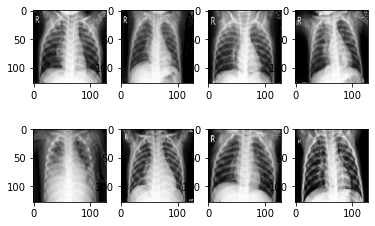

In [19]:
# Show some example images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])

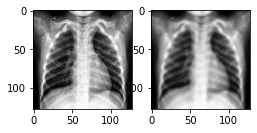

In [35]:
preprocessed_images = []       # Initialize empty list to store the images after pre-processing.

for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)   
     
    
    preprocessed_images.append(blurImg)        # Append image 
    
    # Show examples

plt.subplot(1, 3, 1); plt.imshow(img)         # Show the original image
plt.subplot(1, 3, 2); plt.imshow(blurImg)     # Blur image

preprocessed_images = np.asarray(preprocessed_images)    # Convert to numpy array.

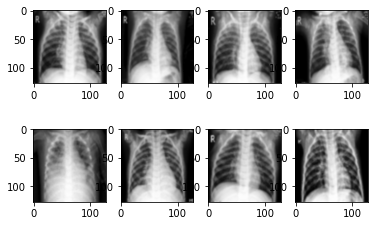

In [36]:
# Show sample result
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(preprocessed_images[i])

In [37]:
# Normalize image data.
preprocessed_images = preprocessed_images / 255

In [38]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

In [39]:
y[0]

array([0, 0, 1])

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessed_images, y, test_size=0.3, random_state=42)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175, 128, 128, 3)
(175, 3)
(76, 128, 128, 3)
(76, 3)


In [42]:
# Reshape data into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175, 128, 128, 3)
(175, 3)
(76, 128, 128, 3)
(76, 3)


In [44]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [45]:
print(X_test.shape)
print(X_val.shape)

(38, 128, 128, 3)
(38, 128, 128, 3)


In [52]:

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(X_train)

In [54]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)       

In [55]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

NameError: name 'optimizers' is not defined